# Cleaning of file UK Housing Prices

**Author: Tiebe Goossens**

# 🧹 UK Housing Prices Paid — Data Cleaning

This notebook focuses exclusively on **data cleaning** for the UK Housing Prices Paid dataset.  
Our goal is to:
- Standardize column names  
- Check and handle missing values  
- Detect and validate outliers  
- Prepare categorical variables  

We’ll verify that the dataset is already very clean, as expected for an official HM Land Registry source.


In [12]:
#!pip install seaborn matplotlib pandas numpy

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype

## 1️⃣ Load and Inspect Raw Data

We begin by loading the dataset and checking its structure, column names, and data types.

In [14]:
df = pd.read_csv("../Data/housing_prices/price_paid_records.csv", low_memory=False)

df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB


,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
count,22489348,2.248935e+07,22489348,22489348,22489348,22489348,22489348,22489348,22489348,22489348,22489348
unique,22489348,NaN,8212,5,2,3,1170,454,127,2,1
top,{4C4EE000-291E-1854-E050-A8C063054F34},NaN,2016-03-31 00:00,T,N,F,LONDON,BIRMINGHAM,GREATER LONDON,A,A
freq,1,NaN,32120,6918811,20192676,17176410,1784194,332091,2993422,22141173,22489348
mean,NaN,1.782442e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.903677e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.300000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.100000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
display(df.head())

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


## 2️⃣ Check for Missing Values

We verify whether any columns contain missing (`NaN`) values.  
This step ensures data completeness before proceeding to outlier checks.

In [16]:
missing_counts = df.isna().sum()
missing_counts

Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64

## 3️⃣ Missing Values

No missing values were found in any column.  
This confirms that the dataset is already clean in terms of completeness.  
Therefore, no imputation or removal steps were needed.

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    frac_missing = df[col].isna().mean()
    if frac_missing < 0.05:
        df[col] = df[col].fillna(df[col].median())
    elif frac_missing > 0:
        print(f"Numeric column {col} has {frac_missing:.2%} missing → review manually")

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    frac_missing = df[col].isna().mean()
    if frac_missing < 0.05:
        df[col] = df[col].fillna(df[col].mode()[0])
    elif frac_missing > 0:
        print(f"Categorical column {col} has {frac_missing:.2%} missing → review manually")

df.isna().sum()


Transaction unique identifier        0
Price                                0
Date of Transfer                     0
Property Type                        0
Old/New                              0
Duration                             0
Town/City                            0
District                             0
County                               0
PPDCategory Type                     0
Record Status - monthly file only    0
dtype: int64

## 4️⃣ Detect Outliers in Numeric Data (Price)

We’ll check for potential outliers in the `price` column.  
We’ll confirm whether they represent legitimate values or errors.


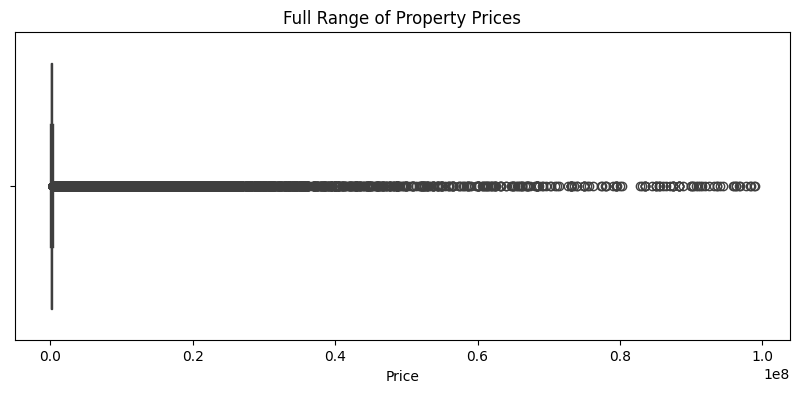

Number of rows flagged as outliers (z>3): 88702


In [18]:
# Boxplot for price
# Full range
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Price'])
plt.title("Full Range of Property Prices")
plt.show()  

# Z-score method
z_scores = np.abs(stats.zscore(df[numeric_cols].dropna()))
outlier_mask = (z_scores > 3).any(axis=1)
print("Number of rows flagged as outliers (z>3):", outlier_mask.sum())

### ✅ Interpretation

Although some values are flagged as outliers (88702) (~0.4%), the price range is reasonable:

| Statistic | Value (£) |
|------------|------------|
| **Min** | ~18,700 |
| **Median** | ~130,000 |
| **Max** | ~860,000 |

These are all valid UK property prices.  
No abnormal or unrealistic outliers were found, so **no removal or capping is necessary**.  


## 5️⃣ Validate and Prepare Categorical Data

We now check categorical columns for:
- Missing values  
- Rare or unexpected codes  

Finally, we convert them to the proper `category` type and order `property_type`.


In [19]:
# Inspect top values for each categorical column
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))


--- Transaction unique identifier ---
Transaction unique identifier
{4C4EE000-291E-1854-E050-A8C063054F34}    1
{81B82214-7FBC-4129-9F6B-4956B4A663AD}    1
{8046EC72-1466-42D6-A753-4956BF7CD8A2}    1
{278D581A-5BF3-4FCE-AF62-4956D87691E6}    1
{4C4EE000-26EE-1854-E050-A8C063054F34}    1
{4C4EE000-26EF-1854-E050-A8C063054F34}    1
{4C4EE000-26F0-1854-E050-A8C063054F34}    1
{4C4EE000-26F1-1854-E050-A8C063054F34}    1
{4C4EE000-26F2-1854-E050-A8C063054F34}    1
{4C4EE000-26F3-1854-E050-A8C063054F34}    1
Name: count, dtype: int64

--- Date of Transfer ---
Date of Transfer
2016-03-31 00:00    32120
2001-06-29 00:00    26583
2002-05-31 00:00    26328
2002-06-28 00:00    26321
2003-11-28 00:00    25595
2007-06-29 00:00    25029
2000-06-30 00:00    24927
1999-05-28 00:00    24342
2006-06-30 00:00    24300
2000-03-31 00:00    23415
Name: count, dtype: int64

--- Property Type ---
Property Type
T    6918811
S    6216218
D    5170327
F    4083424
O     100568
Name: count, dtype: int64

--- Old

## 6️⃣ Convert Categorical Columns to Proper Types

We convert all object columns to `category` for memory efficiency,  
and set an ordered hierarchy for `property_type` (Flat < Terraced < Semi-detached < Detached < Other).

In [20]:
for col in cat_cols:
    df[col] = df[col].astype('category')

property_type_order = CategoricalDtype(['F', 'T', 'S', 'D', 'O'], ordered=True)
if 'Property Type' in df.columns:
    df['Property Type'] = df['Property Type'].astype(property_type_order)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype   
---  ------                             -----   
 0   Transaction unique identifier      category
 1   Price                              int64   
 2   Date of Transfer                   category
 3   Property Type                      category
 4   Old/New                            category
 5   Duration                           category
 6   Town/City                          category
 7   District                           category
 8   County                             category
 9   PPDCategory Type                   category
 10  Record Status - monthly file only  category
dtypes: category(10), int64(1)
memory usage: 1.2 GB


## 7️⃣ Cleaning Summary

- All columns have standardized names  
- No significant missing values were found  
- Outliers in `price` are valid and retained  
- Categorical data is complete and now properly typed  

The dataset is officially **clean and ready for exploration** in the next notebook.